## Import JSON data and clean it up

In [1]:
# Imports

# Base
from collections import Counter
import re
import string
import pandas as pd
import requests
import json

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import emoji
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# Establish the English core web
nlp = spacy.load("en_core_web_lg")

In [2]:
# Get the JSON
url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers_english_only.json'
r = requests.get(url)
df = r.json()

# Simple formating to work with the JSON
df = pd.DataFrame(df.values())
col = ['original_tweet']
df = df.rename(columns={0:'original_tweet'})


# Make emoji free text
# Source: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
df['emoji_free_tweet'] = df['original_tweet'].apply(call_emoji_free)


# Removing url's
def remove_url(text):
    """
    Remove URL's
    Accepts:
        emoji_free_tweet
    Returns:
        emoji_free_tweet & url_free_tweet
    Makes a new column
    """
    # https://www.youtube.com/watch?v=O2onA4r5UaY
    pattern = r"http\S+"
    tokens = re.sub(pattern, "", text)
    return tokens

# Make new url_free_tweet column by applying the function on emoji_free_tweet
df['url_free_tweet'] = df['emoji_free_tweet'].apply(remove_url)

# View the dataframe with 3 columns - original_tweet, emoji_free_tweet, url_free_tweet. 
# url_free_tweet is also emoji free
df

,original_tweet,emoji_free_tweet,url_free_tweet
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,This kid will forever be a legend
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,@Bhuvan_Bam
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,I'm not crying you're crying.
...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...


## Now that I've got the URL & Emoji free tweets, examine with NLP

In [3]:
# Tokenizing the data

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

# Apply tokenizer
df['tokens'] = df['url_free_tweet'].apply(tokenize)

# View those tokens (the 4th column)
df

,original_tweet,emoji_free_tweet,url_free_tweet,tokens
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,This kid will forever be a legend,"[this, kid, will, forever, be, a, legend]"
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","[if, you, truly, believe, lebrons, mindset, co..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker, our, prices, have, never, been, l..."
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,@Bhuvan_Bam,[bhuvanbam]
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,I'm not crying you're crying.,"[im, not, crying, youre, crying]"
...,...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,"[mirandasleeper, the, offerings, in, that, f3,..."
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,"[this, will, be, the, defining, segment, of, t..."
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","[frankmiskelly, i, dont, like, it, i, love, it..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,"[excited, for, my, brother, shufly10, as, he, ..."


## Not really that important, but it returns word counts - ok, it's kind of important

In [4]:
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

In [5]:
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 
                                            'i’m', 'im', 'want'])

tokens = []

for doc in tokenizer.pipe(df['url_free_tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)
tokens = []

for doc in tokenizer.pipe(df['url_free_tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
132,like,599,628,1.0,0.005413,0.005413,0.060225
574,people,482,533,2.0,0.004594,0.010007,0.048462
631,new,323,352,3.0,0.003034,0.013041,0.032475
152,time,317,331,4.0,0.002853,0.015893,0.031872
47,know,274,296,5.0,0.002551,0.018445,0.027549
91,don’t,246,274,6.0,0.002362,0.020806,0.024734
151,think,261,272,7.0,0.002344,0.023151,0.026242
199,good,239,250,8.0,0.002155,0.025305,0.024030
173,need,224,240,9.0,0.002069,0.027374,0.022522
87,day,224,236,10.0,0.002034,0.029408,0.022522


In [6]:
# Update it based on a split of each of our documents
df['tokens_count'] = df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(15)

[('like', 628),
 ('people', 533),
 ('new', 352),
 ('time', 331),
 ('know', 296),
 ('don’t', 274),
 ('think', 272),
 ('good', 250),
 ('need', 240),
 ('day', 236),
 ('trump', 233),
 ('follow', 221),
 ("don't", 219),
 ('love', 212),
 ('@realdonaldtrump', 209)]

In [7]:
# Make the word counts a dataframe
wc = pd.DataFrame.from_dict(word_counts, orient='index')
wc = wc.reset_index()
wc = wc.rename(columns={'index':'word', 0:'count'})
wc[:5]

,word,count
0,kid,12
1,forever,16
2,legend,8
3,truly,23
4,believe,77


In [8]:
# A list of all the words
# wc_word_list = wc['word'].tolist()
# wc_word_list

In [9]:
df

,original_tweet,emoji_free_tweet,url_free_tweet,tokens,tokens_count
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,This kid will forever be a legend,"[kid, forever, legend]",None
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","[truly, believe, lebrons, mindset,, competitiv...",None
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker!, prices, lower!!!]",None
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,@Bhuvan_Bam,[@bhuvan_bam],None
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,I'm not crying you're crying.,"[crying, you're, crying.]",None
...,...,...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,"[@mirandasleeper, offerings, f-3, closed, prev...",None
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,"[defining, segment, “the, dance.”]",None
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","[@frank_miskelly, don’t, like, it,, love, it!,...",None
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,"[excited, brother, @shufly10, embarks, new, jo...",None


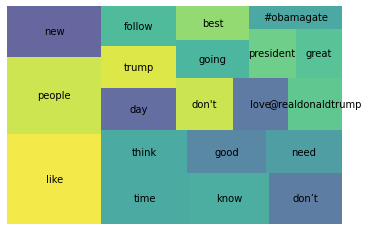

In [10]:
word_count_df = count(df['tokens'])
word_count_df


wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Make all the tokens a single corpus

In [11]:
# Make tokens a string again

# credit : https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]
df

,original_tweet,emoji_free_tweet,url_free_tweet,tokens,tokens_count,tokens_back_to_text
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,This kid will forever be a legend,"[kid, forever, legend]",None,kid forever legend
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","[truly, believe, lebrons, mindset,, competitiv...",None,"truly believe lebrons mindset, competitive fir..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker!, prices, lower!!!]",None,buttlicker! prices lower!!!
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,@Bhuvan_Bam,[@bhuvan_bam],None,@bhuvan_bam
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,I'm not crying you're crying.,"[crying, you're, crying.]",None,crying you're crying.
...,...,...,...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,"[@mirandasleeper, offerings, f-3, closed, prev...",None,@mirandasleeper offerings f-3 closed previous ...
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,"[defining, segment, “the, dance.”]",None,defining segment “the dance.”
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","[@frank_miskelly, don’t, like, it,, love, it!,...",None,"@frank_miskelly don’t like it, love it! think ..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,"[excited, brother, @shufly10, embarks, new, jo...",None,"excited brother @shufly10 embarks new journey,..."


In [12]:
# Makes a list of all the strings from df['tokens_back_to_text']
word_list = df['tokens_back_to_text'].to_list()
# word_list

# Takes `word_list` above to a single corpus of text
corpus = ' '.join([str(x) for x in word_list])
# corpus

## Word cloud the tweets

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

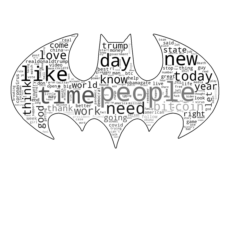

In [18]:
# Source: https://www.youtube.com/watch?v=eHxWshJpoRk

# Set text for easy display 
text = corpus

# Set wordclouds stopwords
stopwords = set(STOPWORDS)

#Appearance-related
custom_mask = np.array(Image.open('batman.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

#Plotting
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Save as file
# wc.to_file('Batman_wordcloud.png')

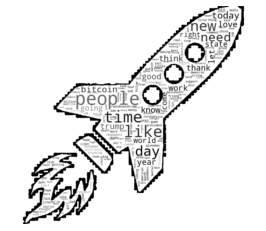

In [30]:
# Because it's for Elon Musk, here's a rocket wordcloud

text = corpus

# Set wordclouds stopwords
stopwords = set(STOPWORDS)

#Appearance-related
custom_mask = np.array(Image.open('rocket.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

#Plotting
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Save as file
# wc.to_file('rocket_wordcloud.png')

## Apply Gensim stopwords also

In [31]:
# Import
from gensim.parsing.preprocessing import STOPWORDS


STOPWORDS = STOPWORDS.union(STOP_WORDS).union(stopwords)

In [32]:
STOPWORDS = 

frozenset({'\n',
           '\n\n',
           ' ',
           '&amp;',
           "'d",
           "'ll",
           "'m",
           "'re",
           "'s",
           "'ve",
           '-',
           '.',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
   

In [19]:
word_counts

Counter({'kid': 12,
         'forever': 16,
         'legend': 8,
         'truly': 23,
         'believe': 77,
         'lebrons': 1,
         'mindset,': 2,
         'competitive': 2,
         'fire,': 3,
         'intensity,': 1,
         'drive': 15,
         'win,': 1,
         'love': 212,
         'game': 81,
         'match': 8,
         'jordan’s': 1,
         'longer': 16,
         'value': 18,
         'opinion': 12,
         'real': 109,
         'life.': 19,
         'buttlicker!': 1,
         'prices': 8,
         'lower!!!': 1,
         '@bhuvan_bam': 1,
         'crying': 13,
         "you're": 88,
         'crying.': 4,
         'vintage': 3,
         'images': 9,
         'reimagined': 1,
         '@k_koi': 1,
         'close': 34,
         'life': 93,
         'falling': 8,
         'apart': 6,
         '4': 90,
         'million': 87,
         'subs': 3,
         'customs': 2,
         'tonight?': 3,
         'yay': 1,
         'nay': 1,
         'country': 77,
    